In [16]:
import pandas as pd

In [17]:
import matplotlib.pyplot as plt

In [18]:
df = pd.read_excel('Ganguly_odi.xlsx')

In [19]:
df

,Inning,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending
0,1,3,33,13,0,0,23.07,6,lbw,1,v West Indies,Brisbane,1992-01-11
1,2,46,117,83,3,0,55.42,3,stumped,1,v England,Manchester,1996-05-26
2,3,16,0,41,3,0,39.02,3,caught,1,v Sri Lanka,Colombo (RPS),1996-08-28
3,4,36,59,52,3,1,69.23,3,caught,2,v Zimbabwe,Colombo (SSC),1996-09-01
4,5,59,102,75,7,0,78.66,7,lbw,1,v Australia,Colombo (SSC),1996-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,0,9,7,0,0,0.00,1,caught,2,v Australia,Wankhede,2007-10-17
296,297,39,87,55,6,1,70.90,1,run out,2,v Pakistan,Guwahati,2007-11-05
297,298,6,2,3,1,0,200.00,1,bowled,1,v Pakistan,Mohali,2007-11-08
298,299,39,79,46,4,1,84.78,1,bowled,1,v Pakistan,Kanpur,2007-11-11


In [20]:
# Filtering the DataFrame to include data up to the 50th inning
df_up_to_50th_inning = df[df['Inning'] <= 50]

# Calculating the total runs scored up to the 50th inning
total_runs_up_to_50th_inning = df_up_to_50th_inning['Runs'].sum()

# Calculating the total dismissals up to the 50th inning
total_dismissals_up_to_50th_inning = (df_up_to_50th_inning['Dismissal'] != 'not out').sum()

# Calculating the batting average after 50 innings
batting_average_after_50th_inning = total_runs_up_to_50th_inning / total_dismissals_up_to_50th_inning

print("Batting average after 50 innings:", batting_average_after_50th_inning)

Batting average after 50 innings: 40.26086956521739


In [21]:
import pandas as pd

# Assuming you've loaded your dataset into 'df'

# Create an empty list to store the batting averages
averages_by_range = []

# Iterating through innings in increments of 50
for start_inning in range(1, df['Inning'].max() + 1, 50):
    end_inning = start_inning + 49  # Calculate the end inning for the range
    
    # Filtering the DataFrame for matches within the current range
    df_range = df[(df['Inning'] >= start_inning) & (df['Inning'] <= end_inning)]
    
    # Calculating the average for the current range
    total_runs = df_range['Runs'].sum()
    total_dismissals = (df_range['Dismissal'] != 'not out').sum()
    
    # Avoid division by zero errors
    if total_dismissals > 0:
        average = total_runs / total_dismissals
    else:
        average = 0.0
    
    # Appending the average to the list
    averages_by_range.append({
        'Inning Range': f"{start_inning}-{end_inning}",
        'Batting Average': average
    })

# Creating a DataFrame from the list of averages
averages_table = pd.DataFrame(averages_by_range)

print("Sourav Ganguly's batting averages by intervals of 50 innings")
print(averages_table)


Sourav Ganguly's batting averages by intervals of 50 innings
  Inning Range  Batting Average
0         1-50        40.260870
1       51-100        42.702128
2      101-150        49.000000
3      151-200        41.250000
4      201-250        34.777778
5      251-300        36.541667


In [22]:
# Create an empty list to store the batting averages
averages_by_range = []

# Iterate through innings in increments of 25
for start_inning in range(1, df['Inning'].max() + 1, 25):
    end_inning = start_inning + 24  # Calculate the end inning for the range
    
    # Filter the DataFrame for matches within the current range
    df_range = df[(df['Inning'] >= start_inning) & (df['Inning'] <= end_inning)]
    
    # Calculate the average for the current range
    total_runs = df_range['Runs'].sum()
    total_dismissals = (df_range['Dismissal'] != 'not out').sum()
    
    # Avoid division by zero errors
    if total_dismissals > 0:
        average = total_runs / total_dismissals
    else:
        average = 0.0
    
    # Append the average to the list
    averages_by_range.append({
        'Inning Range': f"{start_inning}-{end_inning}",
        'Batting Average': average
    })

# Create a DataFrame from the list of averages
averages_table = pd.DataFrame(averages_by_range)

# Display the table
print(averages_table)


   Inning Range  Batting Average
0          1-25        31.217391
1         26-50        49.304348
2         51-75        41.208333
3        76-100        44.260870
4       101-125        45.869565
5       126-150        52.272727
6       151-175        43.041667
7       176-200        39.458333
8       201-225        40.619048
9       226-250        29.666667
10      251-275        32.120000
11      276-300        41.347826


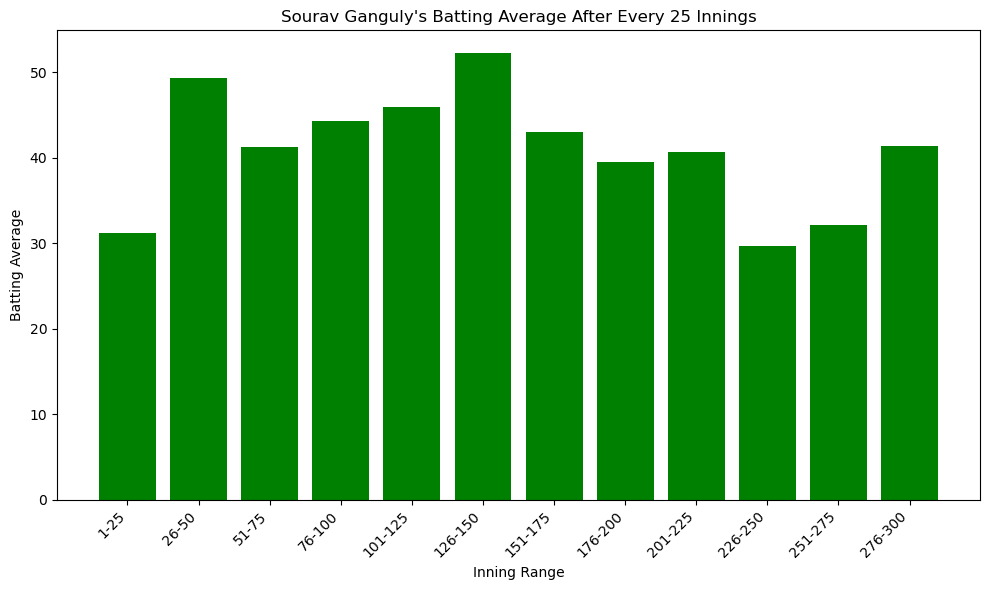

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(averages_table['Inning Range'], averages_table['Batting Average'], color='green')
plt.title("Sourav Ganguly's Batting Average After Every 25 Innings")
plt.xlabel("Inning Range")
plt.ylabel("Batting Average")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

    Inning   Runs
0       25    718
1       50   1852
2       75   2841
3      100   3859
4      125   4914
5      150   6064
6      175   7097
7      200   8044
8      225   8897
9      250   9609
10     275  10412
11     300  11363


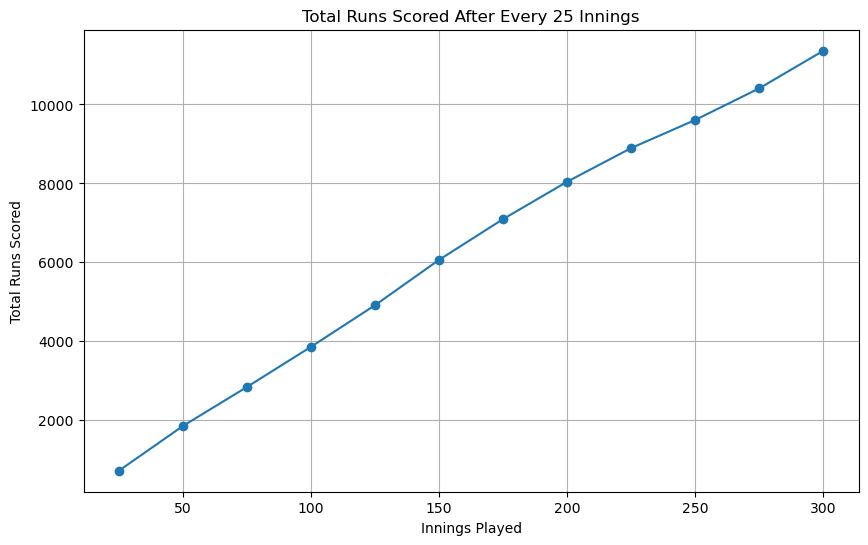

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating empty lists to store the innings and total runs
innings_played = []
total_runs_scored = []

# Initializing variables for the cumulative sum
cumulative_runs = 0
innings_counter = 0

# Iterating through the DataFrame to calculate total runs after every 25 innings
for index, row in df.iterrows():
    innings_counter += 1
    cumulative_runs += row['Runs']
    
    # Check if 25 innings have been completed
    if innings_counter % 25 == 0:
        innings_played.append(innings_counter)
        total_runs_scored.append(cumulative_runs)

# Creating a DataFrame from the lists
totals_df = pd.DataFrame({'Inning': innings_played, 'Runs': total_runs_scored})

print(totals_df)

# Creating a line graph to visualize total runs scored after every 25 innings
plt.figure(figsize=(10, 6))
plt.plot(totals_df['Inning'], totals_df['Runs'], marker='o', linestyle='-')
plt.title("Total Runs Scored After Every 25 Innings")
plt.xlabel("Innings Played")
plt.ylabel("Total Runs Scored")
plt.grid(True)
plt.show()


   Innings Interval  Runs
0              1-25   718
1             26-50  1134
2             51-75   989
3            76-100  1018
4           101-125  1055
5           126-150  1150
6           151-175  1033
7           176-200   947
8           201-225   853
9           226-250   712
10          251-275   803
11          276-300   951


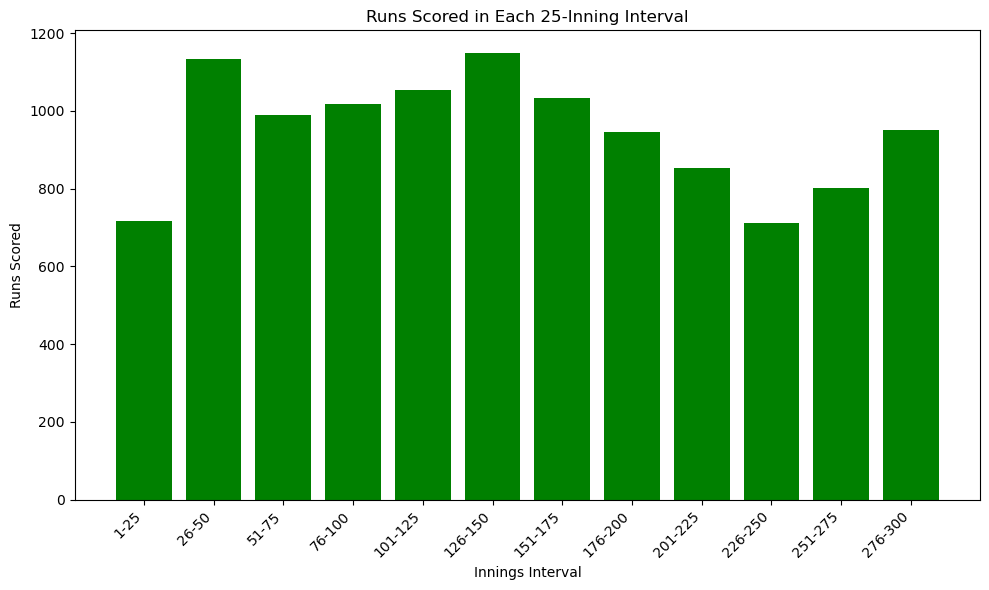

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating empty lists to store the intervals and runs scored in each interval
innings_intervals = []
runs_in_interval = []

# Initializing variables for tracking the interval
interval_start = 1
interval_end = 25
interval_runs = 0

# Iterating through the DataFrame to calculate runs scored in each 25-inning interval
for index, row in df.iterrows():
    innings_played = row['Inning']
    runs_scored = row['Runs']
    
    if innings_played >= interval_start and innings_played <= interval_end:
        interval_runs += runs_scored
    
    # Check if 25 innings have been completed
    if innings_played == interval_end:
        innings_intervals.append(f"{interval_start}-{interval_end}")
        runs_in_interval.append(interval_runs)
        
        # Update interval variables
        interval_start = interval_end + 1
        interval_end += 25
        interval_runs = 0

# Creating a DataFrame from the lists
interval_df = pd.DataFrame({'Innings Interval': innings_intervals, 'Runs': runs_in_interval})

print(interval_df)

plt.figure(figsize=(10, 6))
plt.bar(interval_df['Innings Interval'], interval_df['Runs'], color='green')
plt.title("Runs Scored in Each 25-Inning Interval")
plt.xlabel("Innings Interval")
plt.ylabel("Runs Scored")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
